## Report
# The impact of the EUR/AUD currency exchange rate on the travel decisions of Germans visiting Australia

Jin Zhang

6 Jan 2024

## Introduction

The exchange rates between nations are constantly fluctuating due to various reasons. The fluctuation of exchange rates can sway the purchasing capacity of a currency in the realms of international trade or tourism. 

This project specifically examines the exchange rate dynamics between the Euro (EUR) and the Australian dollar (AUD) alongside the influx of German tourists to Australia over twenty years from Jan 2000 to Aug 2023. The objective is to find whether there exists a correlation between the EUR/AUD exchange rate and the travel patterns of German citizens to Australia. If the EUR/AUD exchange rate allows for a stronger purchasing power of the Euro compared to the Australian Dollar, will German individuals be willing to travel more to Australia to fully capitalize on this currency advantage? 

To explore this question, the evolution of the exchange rate between EUR and AUD, as well as the statistics regarding German tourist arrivals in Australia will be examined. Subsequently, a comparison and correlation analysis between the exchange rate and tourist numbers will be conducted. Ultimately, the findings aim to conclude whether the EUR/AUD exchange rate has an impact on the German tourists traveling to Australia.

## Methods

To acquire the exchange rate data, the European Central Bank (ECB) database was consulted. The statistics on the number of German tourists visiting Australia were sourced from the Australian Bureau of Statistics (ABS). Both agencies offer open data sources accessible to the public. 

## Data Sources

Datasource 1: Exchange Rate EUR/AUD 
Data URL: https://data.ecb.europa.eu/data/datasets/EXR/EXR.M.AUD.EUR.SP00.A
It is provided by the European Central Bank showing the exchange rate between euro and Australian dollar over time.

Datasource 2: Visitor arrivals and resident returns (in Australia)
Data URL: https://explore.data.abs.gov.au/vis?tm=visitor%20arrivals&pg=0&df[ds]=ABS_ABS_TOPICS&df[id]=OAD_COUNTRY&df[ag]=ABS&df[vs]=1.0.0&pd=2000-01%2C2023-08&dq=...M&ly[cl]=TIME_PERIOD&ly[rw]=COUNTRY_RESID&ly[rs]=CAT_TRAVELLER
It is provided by the Australian Bureau of Statistics showing Visitor arrivals and resident returns from selected Countries of Residence/Destinations.


### Data Transformation

Datapipelines are built to obtain data from the above mentioned data sources, clean the data for further analysis, and store in sqlite database. The resulting database contains two tables "ExchangeRate" and "TouristNr".

### Preparation

#### Install Dependencies

In [4]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install pandasdmx
%pip install 'SQLAlchemy==2.0.23'

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kern

#### Import Modules

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandasdmx as sdmx
from sqlalchemy import create_engine

#### Load Data

In [28]:
# Dataset1: Exchange Rate Euro/Australian Dollar

# Extract data from European Central Bank (ECB) with selected currency and time period
ecb = sdmx.Request('ECB')

ecb_data_response = ecb.data(resource_id = 'EXR', key={'CURRENCY': ['AUD', 'EUR']}, params = {'startPeriod': '2000-01', 'endPeriod': '2023-08'})
ecb_data = ecb_data_response.data[0]

# Extract the monthly average data
monthly = [s for sk, s in data1.series.items() if sk.FREQ == 'M' and sk.EXR_SUFFIX == 'A']

cur_df = pd.concat(sdmx.to_pandas(monthly))
cur_df.shape
cur_df.tail()

# Load data to database "Source" in table "ExchangeRate"
engine = create_engine("sqlite:////workspaces/made-template/data/sources.sqlite")
cur_df.to_sql('ExchangeRate', engine, if_exists = 'replace', index = True)

2024-01-06 17:14:13,864 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


284

In [29]:
# Dataset2: German Tourist Number from Australian Bureau of Statistics (ABS)

# Extract data from ABS, with selected type of visitor and time period
abs = sdmx.Request('ABS_XML')

abs_data_response = abs.data(resource_id = 'OAD_COUNTRY', params = {'startPeriod': '2000-01', 'endPeriod': '2023-08'})
abs_data = abs_data_response.data[0]

# Specify type of visitor (not residence return), nationality German
visitor = [c for ck, c in abs_data.series.items() if ck.CAT_TRAVELLER == '06' and ck.COUNTRY_RESID == '2304']

abs_df = pd.concat(sdmx.to_pandas(visitor))
abs_df.shape
abs_df.tail()

# Load data to database "Source" in table "TouristNr"
abs_df.to_sql('TouristNr', engine, if_exists = 'replace')

284

In [30]:
# Read both datasets from database for further analysis
df1 = pd.read_sql_table('ExchangeRate', engine, index_col='TIME_PERIOD')
df2 = pd.read_sql_table('TouristNr', engine, index_col='TIME_PERIOD')

#### Analysis

First, both the exchange rate and tourist numbers over the years will be presented to show patterns and trends.

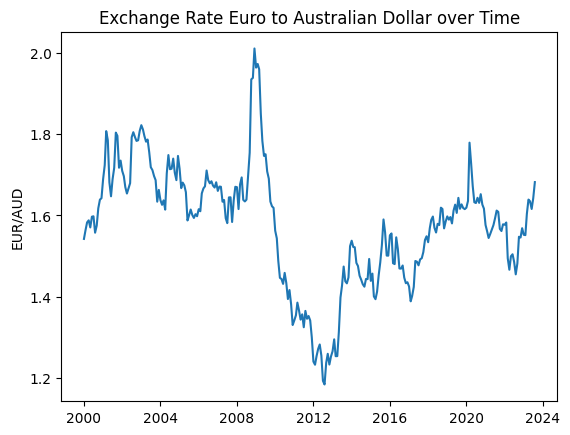

In [19]:
# Generate Trend of Dataset1: Exchange Rate
plt.plot(np.asarray(df1.index, dtype='datetime64[s]'), df1['value'])

plt.title('Exchange Rate Euro to Australian Dollar over Time')
plt.ylabel('EUR/AUD')

plt.show()

During this time period, there is no clear pattern observed in the development of the exchange rate as above chart shows.

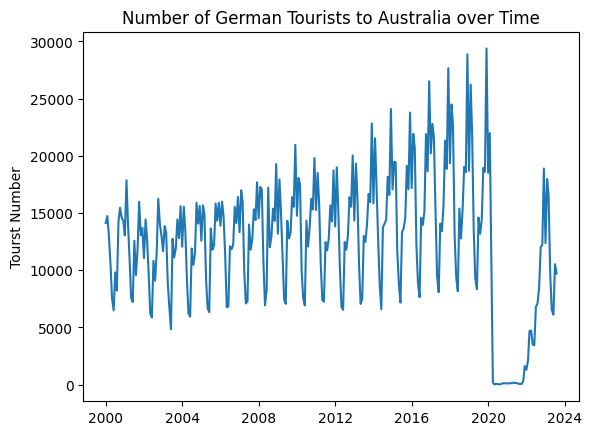

In [20]:
# Generate Trend of Dataset2: Number of German Tourists to Australia
plt.plot(np.asarray(df2.index, dtype='datetime64[s]'), df2['value'])

plt.title('Number of German Tourists to Australia over Time')
plt.ylabel('Tourst Number')

plt.show()


The tourist numbers exhibit a distinct and consistent growth until 2020, the number significantly dropped with the onset of the global pandemic, leading to a significant reduction in international travel. Additionally, a noticeable seasonal pattern is evident, with peaks occurring during the winter months in Germany, corresponding to summer in Australia, and lowest numbers in the German summer and Australian winter.

To explore the potential relationship between the development of the EUR/AUD exchange rate and the number of German tourists visiting Australia, the two datasets covering the same time period are presented in the chart below. The yellow line illustrates the trend of the exchange rate, while the green line represents the tourist numbers. It is hard to identify any apparent relationship between these datasets within the specified timeframe.

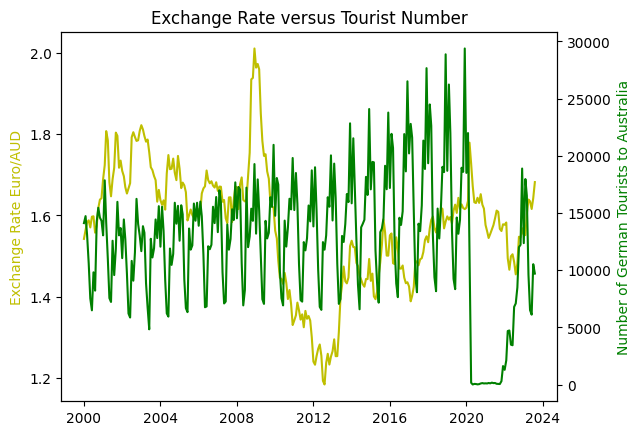

In [22]:
# Generation comparison between Exchange Rate EUR/AUD and German Tourist Numbers to Australia
x = np.asarray(df1.index, dtype='datetime64[s]')
fig, g = plt.subplots()
h = g.twinx()
g.plot(x, df1['value'], 'y')
h.plot(x, df2['value'],'g-')

plt.title('Exchange Rate versus Tourist Number')
plt.xlabel('Year')
g.set_ylabel('Exchange Rate Euro/AUD', color='y')
h.set_ylabel('Number of German Tourists to Australia', color='g')

plt.show()


To better observe the possible relationship between the two datasets, the scatter plot is used. 

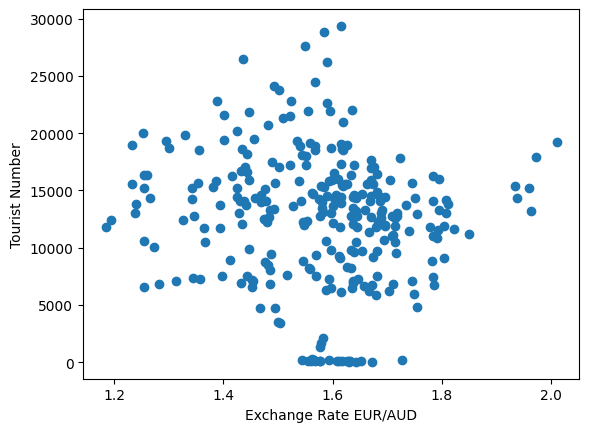

In [25]:
# Visualize correlation between Exchange Rate EUR/AUD and German Tourist Numbers to Australia
x = df1['value']
y = df2['value']
plt.scatter(x,y)
plt.xlabel('Exchange Rate EUR/AUD')
plt.ylabel('Tourist Number')

plt.show()

Upon the scatter plot above, it appears that there is no apparent correlation between the two datasets. To provide a quantitative assessment and offer a more definitive answer to the project's question, the Correlation Coefficient between the EUR/AUD exchange rate and German tourist numbers is calculated as follows.

In [26]:
# Calculate Correlation Coefficient
cols1 = ['Exchange Rate']
cols2 = ['Tourist Number']

correlations = []
for c1 in cols1:
    for c2 in cols2:
        corr= df1['value'].corr(df2['value'])
        correlations.append({
            'x': c1,
            'y': c2,
            'Correlation Coefficient': corr
        } 
        )

df_corr = pd.DataFrame(correlations, columns=correlations[0].keys())
df_corr.set_index(['x', 'y'], inplace=True)
df_corr.sort_values('Correlation Coefficient', ascending=False)


,,Correlation Coefficient
x,y,
Exchange Rate,Tourist Number,-0.112033


## Result

The analysis reveals that the EUR/AUD exchange rate has exhibited fluctuation without a clear pattern over the specified over 20-year timeframe. In contrast, during the same period, there is a clear and steady growth pattern in the numbers of German tourists to Australia, marked by seasonal peaks. With the comarison between the two through line charts and scatter plot, it was not clear to say there is any relationship between the two. 

The quantitive assessment, i.e. calculation of Correlation Coefficient, was done to give a clear answer to the project's question. The result -0.11 strongly suggests that there is no clear correlation between the EUR/AUD exchange rate and the number of German tourists visiting Australia. Consequently, within the observed time frame (Jan 2020-Aug 2023), it can be concluded that the EUR/AUD exchange rate does not have a clear impact on the travel decisions of German tourists to Australia.

## Discussion

Within the scope and limitation of this project, only the exchange rate was analyzed as a potential influencing factor for German tourists' purchasing power in Australia, therefore influencing their traveling decision. However, there are more complex influencing factors which decide the purchasing power, as well as the travel decisions. For example, the inflation rate in two countries, the per capita disposable income etc can also influence the purchasing power in destination countries. Future research can consider to incorporate a broader set of variables which could offer a more comprehensive understanding of the dynamics of exchange rate influencing German tourists' purchasing power and travel decisions in Australia.